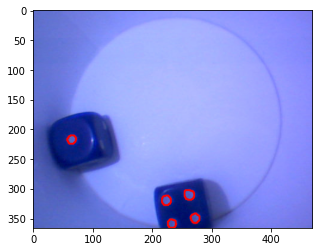

In [26]:
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
from glob import glob
%matplotlib inline 

# camera = cv2.VideoCapture(0)
# _, _ = camera.read()


##TU JEST KOD, KTÓRY W ZAŁOŻENIU MA DZIAŁAĆ 
##Następne komórki to raczej playground
#TODO: dobrac min/max rozmiar oczka
#TODO: dobrać wycięcie obrazka


l = glob("rozproszone/*.jpg")
img = cv2.imread(l[0])
img = img[113:-1,70:-100]
_ ,_ ,red = cv2.split(img)
_, threshh = cv2.threshold(red, 50, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for c in contours:
    (_,_,w,h) = cv2.boundingRect(c)
    if 100<cv2.contourArea(c)<=300  and 0.8<w/h<1.2:  
        cv2.drawContours(img, [c], -1, (0, 0, 255), 2)
        
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


In [14]:
#tool do znajdowania odpowiedniego wycięcia
#Nie mam pojecia czy to jest potrzebne
def getThresh(img,lower=20,a=110,b=-30,c=230,d=-60):    
    img = cv2.imread(img)
    img = img[a:b,c:d]
    plt.imshow(img)
    _,_,red = cv2.split(img) # a w zasadzue chyba red XD
    ret, threshh = cv2.threshold(red, lower, 255, cv2.THRESH_BINARY)
    
    
interactive(getThresh,img=glob("rozproszone/*.jpg"),lower=(0,255,1),
            a = (-200,200,1),
            b = (-200,0,1),
            c = (0,200,1),
            d = (-200,0,1)
            
            
            )

interactive(children=(Dropdown(description='img', options=('rozproszone/269702979_1986249894883117_58937073385…

In [25]:
#HOUGH CIRCLES APPROACH

import numpy as np

def func(img,minDist = 1 , param1 = 300, param2 = 1, minRadius = 1 , maxRadius = 400):
    img = cv2.imread(img)
    img = img[77:-8,68:-104]
    gray,_,_ = cv2.split(img)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, minDist=minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
            
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    
interactive(func,img=glob("rozproszone/*.jpg"),
            minDist = (0,100,1),
                               param1=(0,200,1), param2=(0,50,1),
                               minRadius=(0,10,1), maxRadius=(00,15,1)
            
            
            
            )

interactive(children=(Dropdown(description='img', options=('rozproszone/269702979_1986249894883117_58937073385…